# **Stock Prediction Forecasting Analysis using Machine Learning Algorithms - Nike**

Welcome to the Stock Prediction Forecasting Analysis project! In this notebook, we will apply various machine learning algorithms to predict the stock prices of Nike, Inc. Our objective is to accurately forecast future stock prices by analyzing historical data and employing state-of-the-art machine learning techniques.

## Project Objectives
- **Predict Future Stock Prices:** Utilize machine learning algorithms to forecast future stock prices of Nike.
- **Analyze Historical Data:** Perform a comprehensive analysis of historical stock data to identify trends and patterns.
- **Evaluate Model Performance:** Assess the accuracy and reliability of different machine learning models in predicting stock prices.

## Key Components

### 1. Data Collection and Preprocessing
- **Historical Stock Data:** Gather historical stock prices of Nike from financial databases.
- **Data Cleaning:** Handle missing values, outliers, and ensure data quality.
- **Feature Engineering:** Create relevant features such as moving averages, trading volumes, and other technical indicators.

### 2. Exploratory Data Analysis (EDA)
- **Trend Analysis:** Identify long-term trends and seasonal patterns in the stock prices.
- **Correlation Analysis:** Examine the relationship between stock prices and various market indicators.
- **Visualization:** Use graphs and charts to visualize the stock price trends and patterns.

### 3. Machine Learning Models
- **Regression Models:** Implement linear regression, polynomial regression, and other regression techniques.
- **Time Series Models:** Use ARIMA, SARIMA, and other time series forecasting models.
- **Advanced Machine Learning Algorithms:** Apply LSTM (Long Short-Term Memory), Random Forest, and other advanced models for prediction.

### 4. Model Training and Evaluation
- **Training the Models:** Split the data into training and testing sets to train the models.
- **Evaluation Metrics:** Use metrics such as RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and R² (R-squared) to evaluate model performance.
- **Cross-Validation:** Implement cross-validation techniques to ensure model robustness.

### 5. Results and Insights
- **Model Comparison:** Compare the performance of different models and select the best-performing one.
- **Prediction Accuracy:** Provide insights into the accuracy and reliability of the predictions.
- **Recommendations:** Offer recommendations based on the model’s predictions for potential investment strategies.

### 6. Deployment
- **Prediction Interface:** Develop a user-friendly interface or dashboard to visualize the predictions.
- **Real-time Forecasting:** Implement real-time data updates and prediction capabilities if applicable.

## Tools and Technologies
- **Programming Languages:** Python or R for data analysis and model implementation.
- **Libraries and Frameworks:** Pandas, NumPy, Scikit-learn, TensorFlow/Keras, Statsmodels, Matplotlib, and Seaborn.
- **Data Sources:** Financial APIs like Alpha Vantage, Yahoo Finance, or Quandl for historical stock data.

---

This project aims to leverage machine learning algorithms to accurately predict Nike's stock prices, providing valuable insights for investors and stakeholders. By comparing different models and analyzing their performance, we seek to identify the most effective approach for stock price forecasting. Let's get started!




In this project, we will be using data provided by the YAHOO stock index from the NIKE equity dataset to apply  Machine Learning and Time Series Analysis fundamentals to predict the stock prices.

**STEP 1:**

First, lets load the data into our Library and observe any basic metrics provided in the first set of the dataset:

In [ ]:
#Loading and observing dataset at hand...

# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from google.colab import drive
drive.mount("/content/drive")



# %% Train-Test split for time-series
stockprices = pd.read_csv("/content/drive/MyDrive/NKE.csv", index_col="Date")
print(stockprices.head)

stockprices = stockprices.dropna()

#splitting training set
training_set = stockprices.iloc[:,1:2].values
training_set = pd.DataFrame(training_set)
print('shape is ={}'.format(training_set.shape))
print(training_set[0:5])




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-05-01  126.919998  128.679993  122.820000  126.589996  124.884743   
2023-05-08  127.260002  127.690002  119.029999  120.209999  118.590691   
2023-05-15  119.820000  119.989998  113.099998  114.760002  113.214111   
2023-05-22  112.849998  112.849998  107.000000  107.510002  106.061768   
2023-05-29  108.400002  108.879997  102.900002  107.779999  106.328133   
2023-06-05  107.879997  108.239998  105.180000  105.860001  104.777756   
2023-06-12  106.290001  114.760002  104.599998  113.589996  112.428734   
2023-06-19  111.410004  112.820000  107.300003  109.519997  108.400337   
2023-06-26  109.669998  114.269997  109.669998  110.370003  109.241661   
2023-07-03  111.059998  111

**STEP 2:**

Next, we will graph the stock index overtime using the nessecary library in python in order to accuratley predict the pricing models of the given indexes at hand...

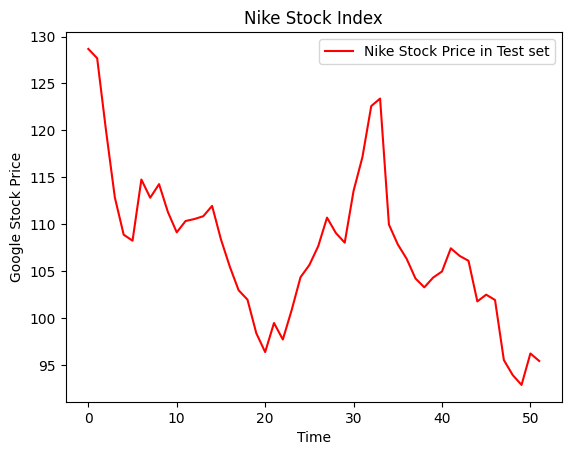

In [ ]:
# prompt: Next, we will graph the stock index overtime using the nessecary library in python in order to accuratley predict the pricing models of the given indexes at hand...

import matplotlib.pyplot as plt
# Plot the stock price over time

#Visualizing the Data
plt.title("Nike Stock Index")
plt.plot(training_set, color = 'red', label = 'Nike Stock Price in Test set')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


# Step 3: Defining Econometric Measurements

In this step, we identify and select the key econometric measurements and indicators that will serve as inputs to our time-series analysis model for predicting Nike's stock value. This involves a comprehensive examination of various financial and economic factors that could influence the stock price.

Firstly, we look at traditional financial metrics such as historical stock prices, trading volumes, price-to-earnings (P/E) ratios, earnings per share (EPS), and dividend yields. These indicators provide a baseline understanding of Nike’s financial performance and market valuation over time.

Next, we incorporate macroeconomic indicators including GDP growth rates, inflation rates, interest rates, and unemployment rates. These variables help us gauge the broader economic environment and its potential impact on consumer spending and corporate profitability.

Additionally, we consider industry-specific factors such as global athletic apparel market trends, competitor performance, and consumer sentiment indices. These measurements offer insights into Nike’s competitive landscape and market position.

Moreover, we integrate advanced econometric techniques such as autoregressive integrated moving average (ARIMA) models, vector autoregression (VAR), and GARCH models to capture the dynamic relationships and volatility patterns within the data.

To evaluate the accuracy of our predictions, we use performance metrics like Root Mean Squared Error (RMSE) and Mean Absolute Percentage Error (MAPE). RMSE provides a measure of the differences between predicted and actual stock prices, while MAPE offers a percentage-based error metric that indicates prediction accuracy relative to the actual stock prices.

Here are the functions used to calculate RMSE and MAPE:

In [ ]:
#### Calculate the metrics RMSE and MAPE ####
def calculate_rmse(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE)
    """
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    return rmse


def calculate_mape(y_true, y_pred):
    """
    Calculate the Mean Absolute Percentage Error (MAPE) %
    """
    y_pred, y_true = np.array(y_pred), np.array(y_true)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

def calculate_perf_metrics(var):
    ### RMSE
    rmse = calculate_rmse(
        np.array(training_set["Close"]),
        np.array(training_set[var]),
    )
    ### MAPE
    mape = calculate_mape(
        np.array(training_set["Close"]),
        np.array(training_set[var]),
    )

def plot_stock_trend(var, cur_title, stockprices=stockprices):
    ax = stockprices[["Close", var, "Weeks"]].plot(figsize=(20, 10))
    plt.grid(False)
    plt.title(cur_title)
    plt.axis("tight")
    plt.ylabel("Stock Price ($)")

# Statistical Analysis of Variables in Stock Index:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

for column in stockprices.columns:
    if column not in ['Close', 'Date']:
        # Print statistical information
        print(f"Statistics for {column}:")
        print(f"Mean: {stockprices[column].mean()}")
        print(f"Median: {stockprices[column].median()}")
        print(f"Standard Deviation: {stockprices[column].std()}")
        print("\n")


Statistics for Open:
Mean: 104.99769259615384
Median: 105.024998
Standard Deviation: 8.235481144778888


Statistics for High:
Mean: 107.44499905769231
Median: 107.540001
Standard Deviation: 8.042877971626568


Statistics for Low:
Mean: 101.94538482692312
Median: 101.865002
Standard Deviation: 7.546436964333331


Statistics for Adj Close:
Mean: 103.64584963461539
Median: 103.933235
Standard Deviation: 7.504947237549786


Statistics for Volume:
Mean: 42297669.23076923
Median: 40097250.0
Standard Deviation: 12896095.255701732





Metrics for 0:
RMSE: 0.0




<Figure size 2000x1000 with 0 Axes>

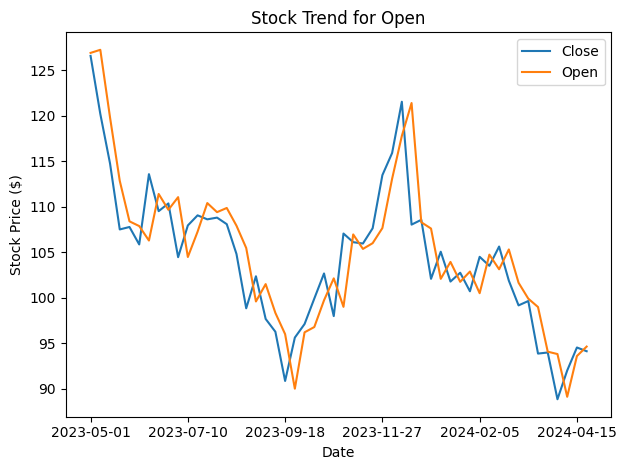

<Figure size 2000x1000 with 0 Axes>

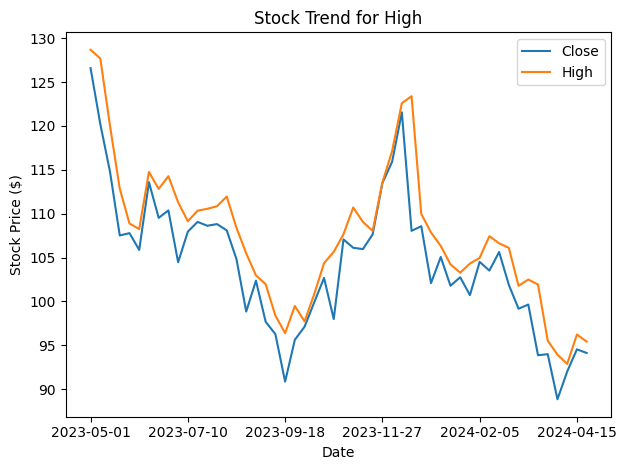

<Figure size 2000x1000 with 0 Axes>

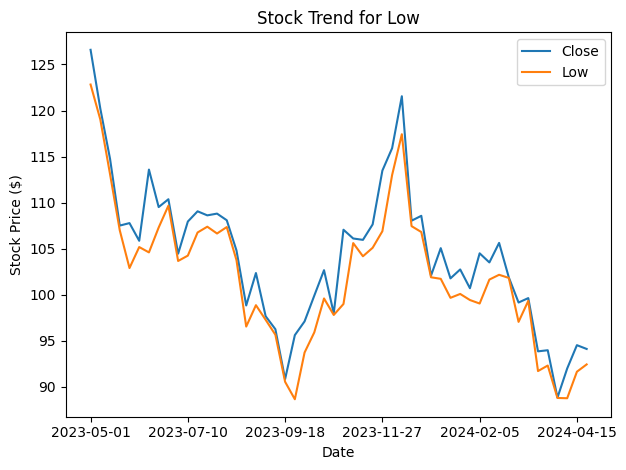

<Figure size 2000x1000 with 0 Axes>

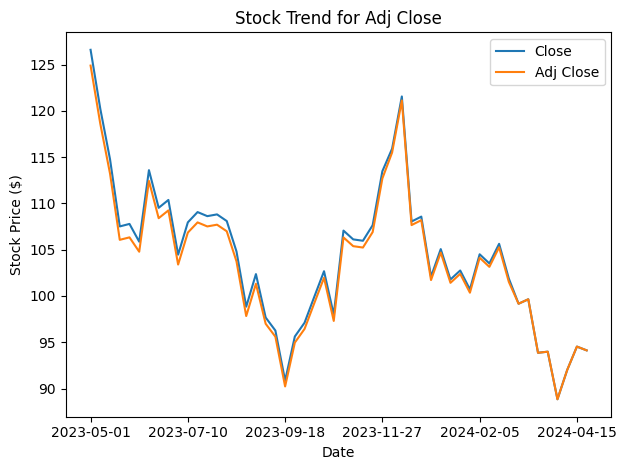

In [ ]:
# Loading and observing dataset at hand...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# Define the RMSE and MAPE calculation functions
def calculate_rmse(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE)
    """
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    return rmse

# Define a function to calculate performance metrics
def calculate_perf_metrics(var):
    ### RMSE
    rmse = calculate_rmse(
        training_set[0],
        training_set[var],
    )
    return rmse

# Applying methods to each variable besides "Close" and "Date"
for column in training_set.columns:
    if column != 'Close':
        rmse = calculate_perf_metrics(column)
        print(f"\nMetrics for {column}:")
        print(f"RMSE: {rmse}")
        print("\n")

# Define a function to plot stock trend
def plot_stock_trend(var, cur_title, stockprices=stockprices):
    plt.figure(figsize=(20, 10))
    ax = stockprices[["Close", var]].plot()
    plt.grid(False)
    plt.title(cur_title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.tight_layout()
    plt.show()


# Define a function to plot stock trend for each variable
def plot_stock_trend_for_all_vars(stockprices):
    for var in stockprices.columns:
      #Doesn't take into account unnessecary variables:
        if var not in ['Close', 'Date', 'Volume']:
            cur_title = f"Stock Trend for {var}"
            plot_stock_trend(var, cur_title, stockprices=stockprices)

# Call the function
plot_stock_trend_for_all_vars(stockprices)


In [ ]:
#Scaling

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
features = ["Open", "High", "Low", "Volume"]
feature_transform = scaler.fit_transform(stockprices[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=stockprices.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2023-05-01,0.991088,1.000000,1.000000,0.042962
2023-05-08,1.000000,0.972354,0.889051,0.072468
2023-05-15,0.804980,0.757330,0.715457,0.279578
2023-05-22,0.622280,0.557945,0.536885,0.406647
2023-05-29,0.505636,0.447082,0.416862,0.512625


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 64)                16896     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
11/11 - 3s - loss: 12138.8164 - val_loss: 11571.9375 - lr: 0.0010 - 3s/epoch - 253ms/step
Epoch 2/100
11/11 - 0s - loss: 12131.1084 - val_loss: 11566.7129 - lr: 0.0010 - 112ms/epoch - 10ms/step
Epoch 3/100
11/11 - 0s - loss: 12123.8721 - val_loss: 11561.3311 - lr: 0.00

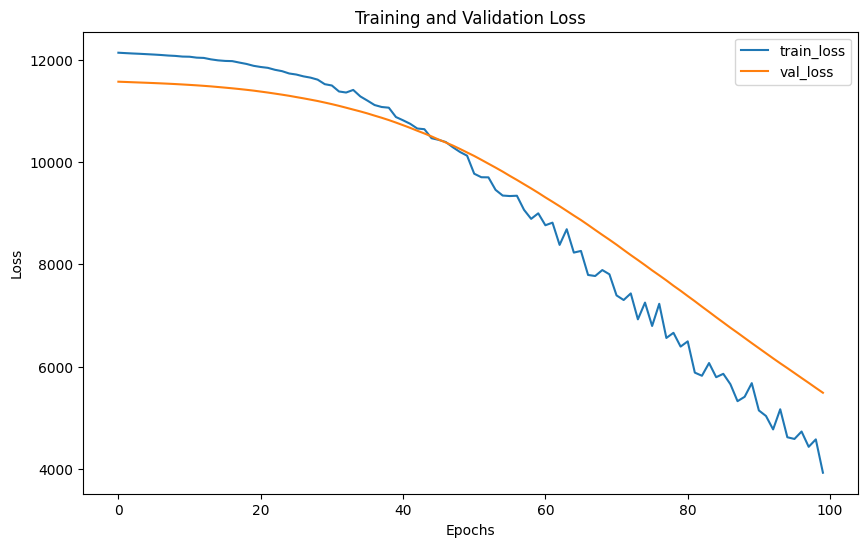

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 64)                16896     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
15/15 - 2s - loss: 11983.3379 - val_loss: 9760.3613 - lr: 0.0010 - 2s/epoch - 103ms/step
Epoch 2/100
15/15 - 0s - loss: 11973.5088 - val_loss: 9756.3389 - lr: 0.0010 - 77ms/epoch - 5ms/step
Epoch 3/100
15/15 - 0s - loss: 11963.1260 - val_loss: 9751.8828 - lr: 0.0010 - 

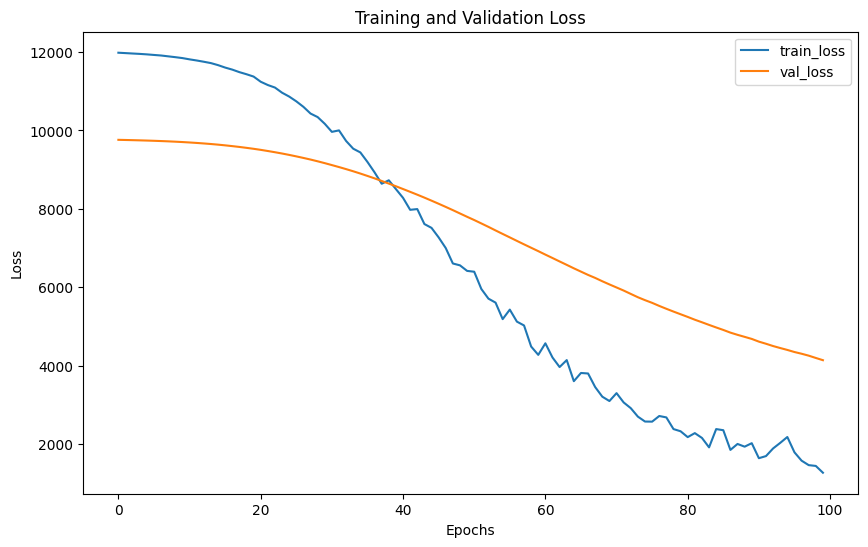

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 64)                16896     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
19/19 - 2s - loss: 11517.1406 - val_loss: 9194.3193 - lr: 0.0010 - 2s/epoch - 81ms/step
Epoch 2/100
19/19 - 0s - loss: 11503.4980 - val_loss: 9184.4199 - lr: 0.0010 - 86ms/epoch - 5ms/step
Epoch 3/100
19/19 - 0s - loss: 11491.2617 - val_loss: 9176.6973 - lr: 0.0010 - 9

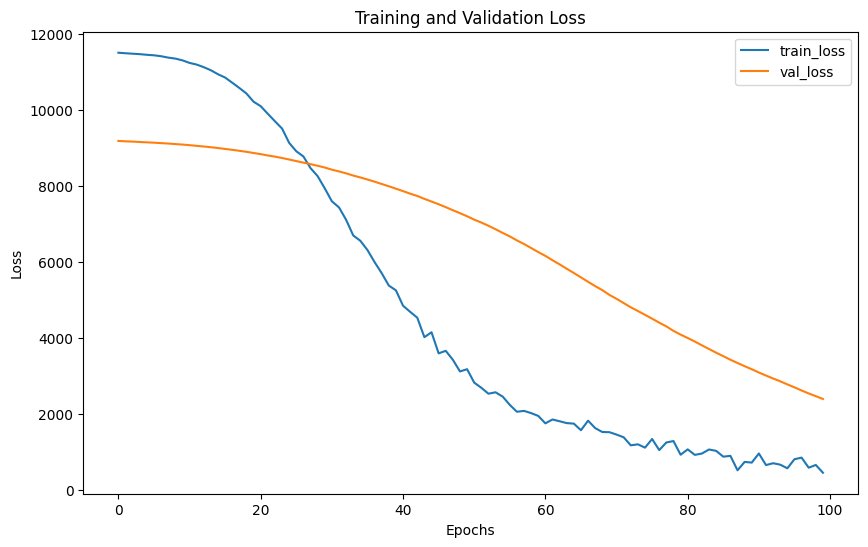

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 64)                16896     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
23/23 - 2s - loss: 11110.8857 - val_loss: 10704.1523 - lr: 0.0010 - 2s/epoch - 67ms/step
Epoch 2/100
23/23 - 0s - loss: 11099.4102 - val_loss: 10693.1738 - lr: 0.0010 - 89ms/epoch - 4ms/step
Epoch 3/100
23/23 - 0s - loss: 11086.1816 - val_loss: 10680.5098 - lr: 0.0010 

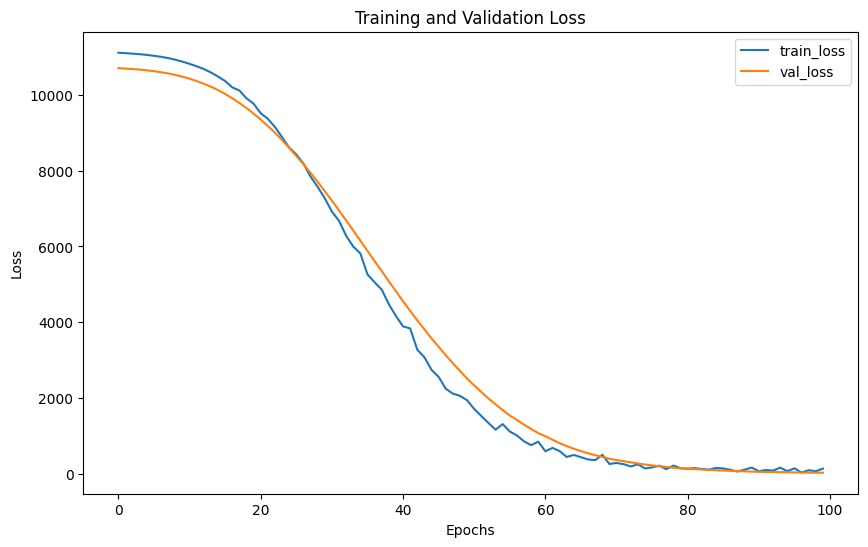

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 64)                16896     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
27/27 - 2s - loss: 11052.0205 - val_loss: 12268.8789 - lr: 0.0010 - 2s/epoch - 57ms/step
Epoch 2/100
27/27 - 0s - loss: 11038.3584 - val_loss: 12254.8926 - lr: 0.0010 - 85ms/epoch - 3ms/step
Epoch 3/100
27/27 - 0s - loss: 11023.2383 - val_loss: 12238.1377 - lr: 0.0010 

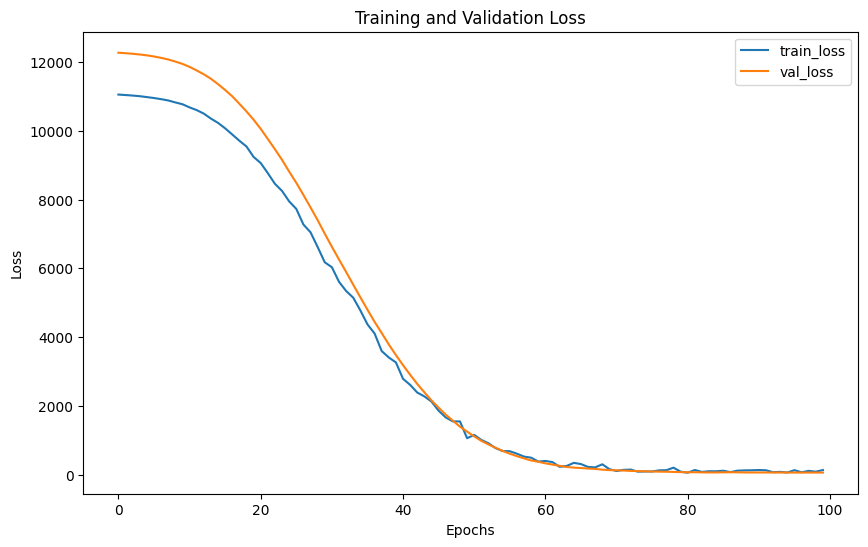

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 64)                16896     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
31/31 - 2s - loss: 11207.0645 - val_loss: 12143.6846 - lr: 0.0010 - 2s/epoch - 60ms/step
Epoch 2/100
31/31 - 0s - loss: 11191.3154 - val_loss: 12124.5107 - lr: 0.0010 - 171ms/epoch - 6ms/step
Epoch 3/100
31/31 - 0s - loss: 11171.9561 - val_loss: 12101.4346 - lr: 0.0010

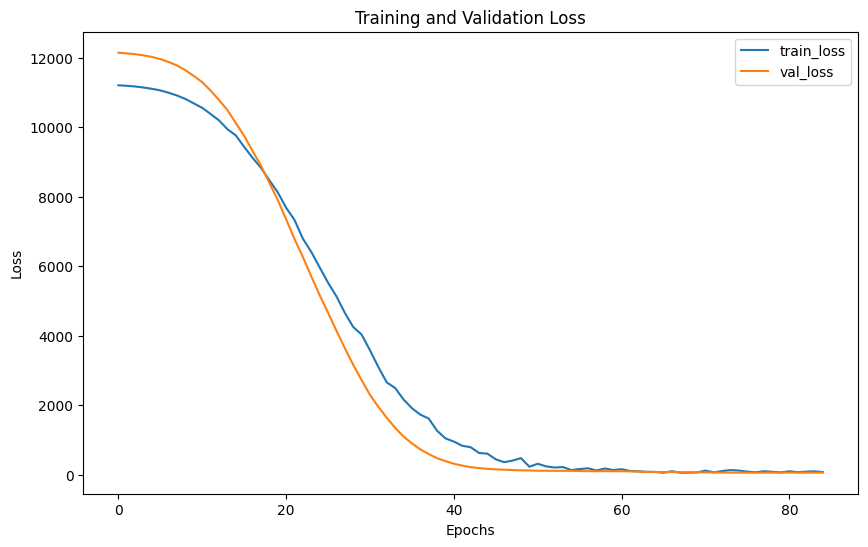

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 64)                16896     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
35/35 - 2s - loss: 11310.3457 - val_loss: 10510.0605 - lr: 0.0010 - 2s/epoch - 62ms/step
Epoch 2/100
35/35 - 0s - loss: 11285.6904 - val_loss: 10491.7998 - lr: 0.0010 - 114ms/epoch - 3ms/step
Epoch 3/100
35/35 - 0s - loss: 11259.0000 - val_loss: 10467.6455 - lr: 0.0010

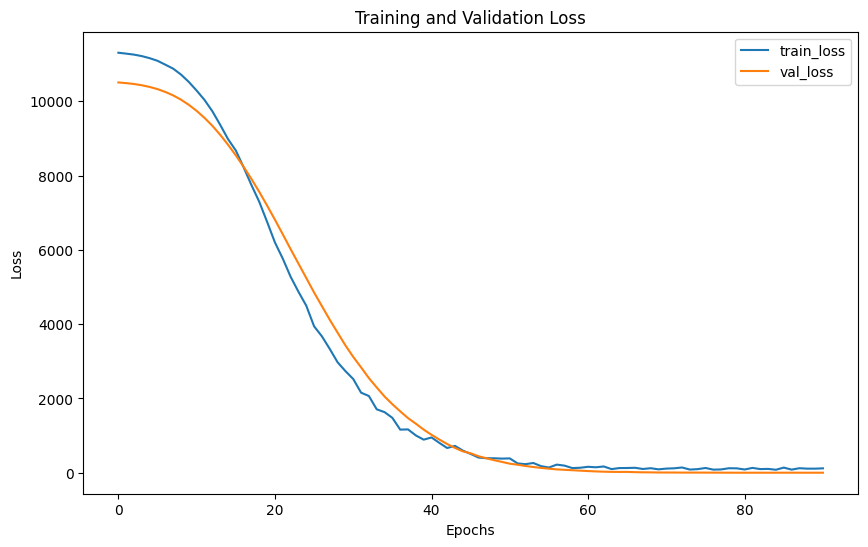

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 64)                16896     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
39/39 - 2s - loss: 11229.4883 - val_loss: 10778.1748 - lr: 0.0010 - 2s/epoch - 61ms/step
Epoch 2/100
39/39 - 0s - loss: 11207.3877 - val_loss: 10758.4795 - lr: 0.0010 - 162ms/epoch - 4ms/step
Epoch 3/100
39/39 - 0s - loss: 11178.3086 - val_loss: 10730.6895 - lr: 0.0010

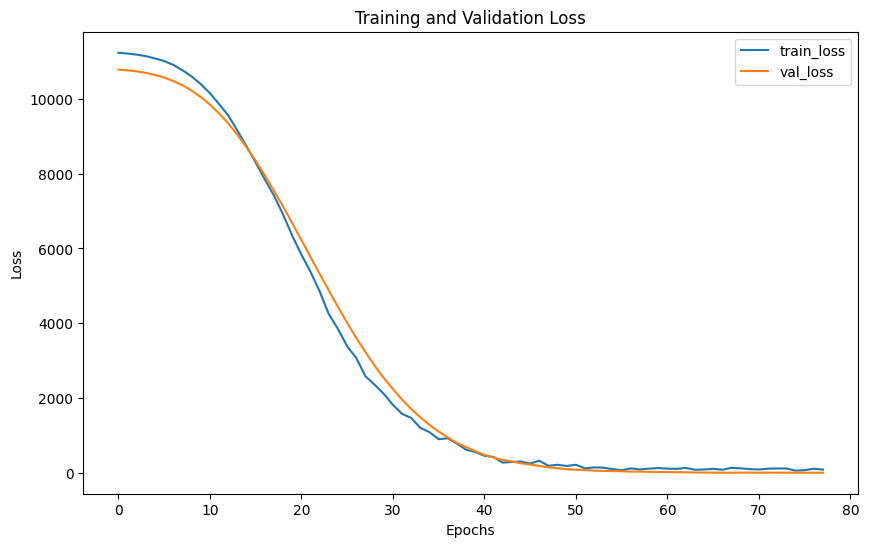

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 64)                16896     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
43/43 - 2s - loss: 11189.5938 - val_loss: 9334.4395 - lr: 0.0010 - 2s/epoch - 36ms/step
Epoch 2/100
43/43 - 0s - loss: 11163.1064 - val_loss: 9310.3105 - lr: 0.0010 - 135ms/epoch - 3ms/step
Epoch 3/100
43/43 - 0s - loss: 11123.4531 - val_loss: 9276.3115 - lr: 0.0010 - 

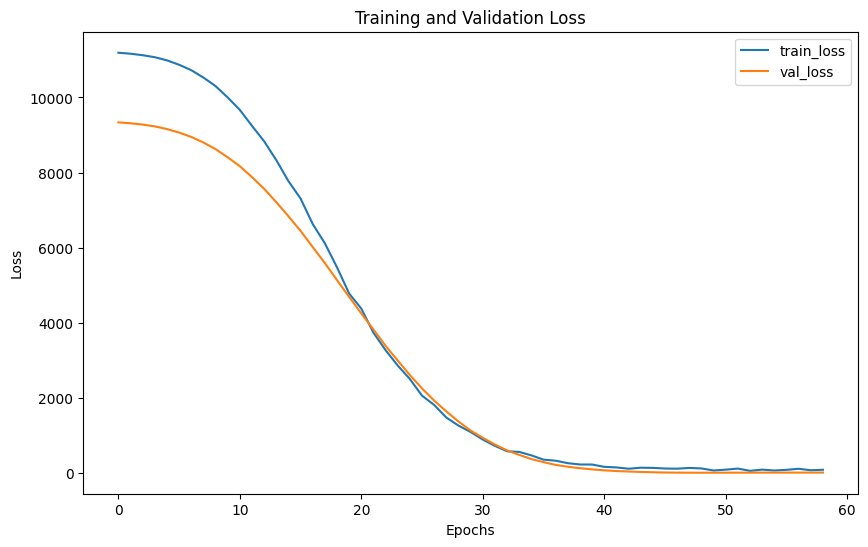

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 64)                16896     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
47/47 - 2s - loss: 11031.9131 - val_loss: 8505.8271 - lr: 0.0010 - 2s/epoch - 33ms/step
Epoch 2/100
47/47 - 0s - loss: 11003.9238 - val_loss: 8466.8184 - lr: 0.0010 - 149ms/epoch - 3ms/step
Epoch 3/100
47/47 - 0s - loss: 10965.3467 - val_loss: 8414.3066 - lr: 0.0010 - 

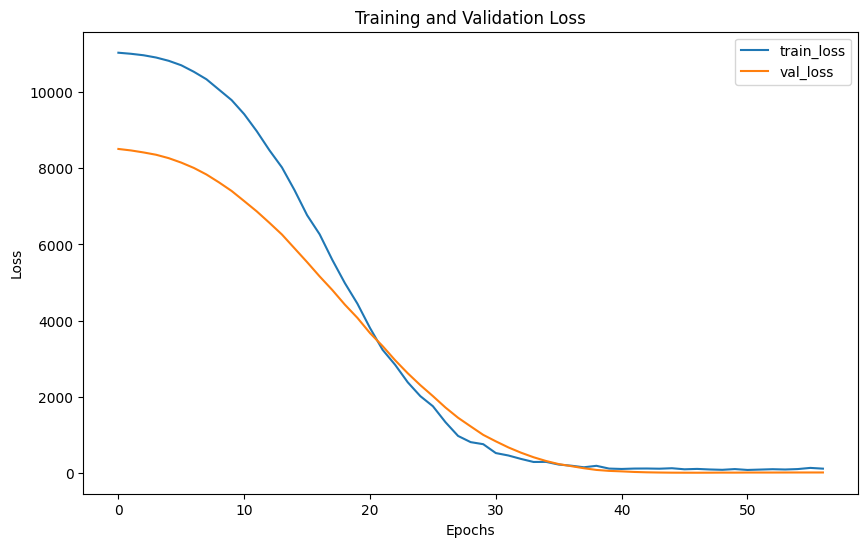

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import plot_model
import matplotlib.pyplot as plt

# Load the data (replace 'stockprices' with your actual data loading code)
data = stockprices

# Select the 'High' column as features (for example)
feature_transform = data[['High']].values
output_var = data[['Close']].values

# Standardize the features
scaler = StandardScaler()
feature_transform = scaler.fit_transform(feature_transform)

# Initialize TimeSeriesSplit
timesplit = TimeSeriesSplit(n_splits=10)

# Prepare the data for LSTM
X = []
y = []
for i in range(len(feature_transform) - 1):
    X.append(feature_transform[i])
    y.append(output_var[i + 1])
X = np.array(X)
y = np.array(y)

# Reshape input to be [samples, time steps, features] for LSTM
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

# Splitting the data using TimeSeriesSplit
for train_index, test_index in timesplit.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Building the LSTM Model
    lstm = Sequential()
    lstm.add(LSTM(64, input_shape=(1, X_train.shape[2]), activation='relu', return_sequences=False))
    lstm.add(Dropout(0.2))  # Add dropout for regularization
    lstm.add(Dense(1))

    # Compile the model with Adam optimizer and learning rate scheduler
    optimizer = Adam(learning_rate=0.001)
    lstm.compile(loss='mean_squared_error', optimizer=optimizer)

    # Print model summary
    lstm.summary()

    # Plot model
    plot_model(lstm, show_shapes=True, show_layer_names=True)
    plt.show()

    # Define callbacks (Early Stopping and Learning Rate Scheduler)
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
    ]

    # Fit the model with callbacks
    history = lstm.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2,
                       validation_data=(X_test, y_test), callbacks=callbacks)

    # Evaluate the model
    train_loss = lstm.evaluate(X_train, y_train, verbose=0)
    test_loss = lstm.evaluate(X_test, y_test, verbose=0)
    print(f'Train Loss: {train_loss}, Test Loss: {test_loss}')

    # Plot training history (optional)
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


1/1 [==============================] - 0s 129ms/step
Train MSE: 1592.21, Test MSE: 424.92
Train MAE: 32.79, Test MAE: 15.79
Train R^2 Score: 0.41, Test R^2 Score: -0.32


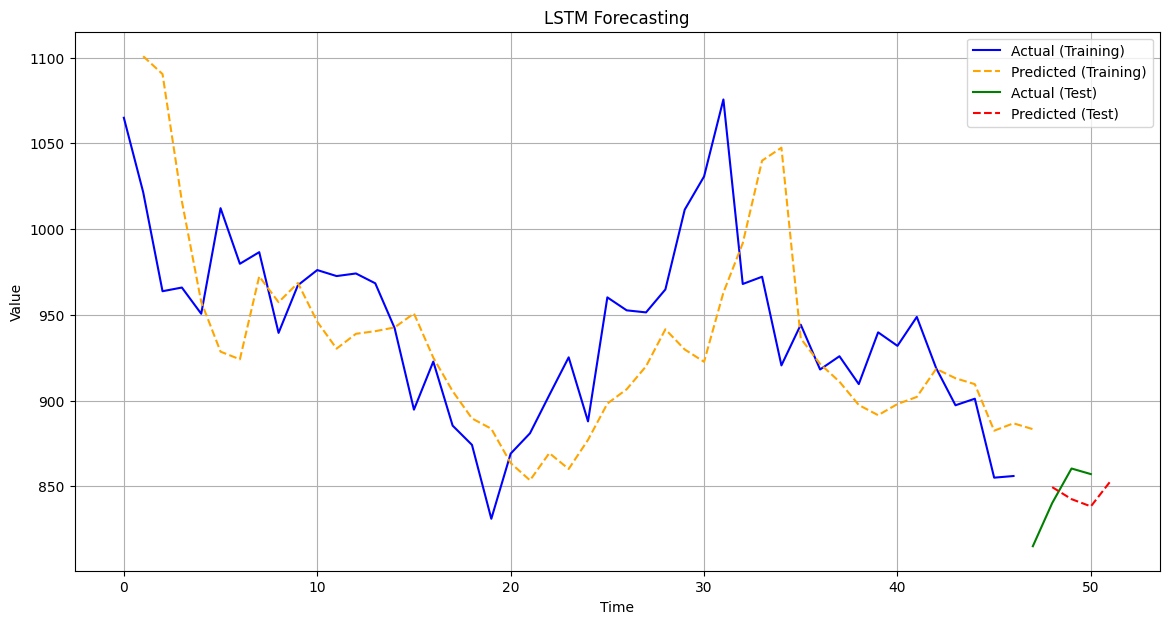

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
train_predictions = lstm.predict(X_train)
test_predictions = lstm.predict(X_test)

# Inverse transform predictions and actual values if scaled
train_predictions = scaler.inverse_transform(train_predictions)
y_train_original = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test_original = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
train_mse = mean_squared_error(y_train_original, train_predictions)
test_mse = mean_squared_error(y_test_original, test_predictions)

train_mae = mean_absolute_error(y_train_original, train_predictions)
test_mae = mean_absolute_error(y_test_original, test_predictions)

train_r2 = r2_score(y_train_original, train_predictions)
test_r2 = r2_score(y_test_original, test_predictions)

print(f'Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}')
print(f'Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}')
print(f'Train R^2 Score: {train_r2:.2f}, Test R^2 Score: {test_r2:.2f}')

# Plotting the forecast
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(np.arange(len(y_train_original)), y_train_original, label='Actual (Training)', color='blue')
plt.plot(np.arange(1, len(train_predictions) + 1), train_predictions, label='Predicted (Training)', linestyle='--', color='orange')

# Plot test data
plt.plot(np.arange(len(y_train_original), len(y_train_original) + len(y_test_original)), y_test_original, label='Actual (Test)', color='green')
plt.plot(np.arange(len(y_train_original) + 1, len(y_train_original) + len(test_predictions) + 1), test_predictions, label='Predicted (Test)', linestyle='--', color='red')

plt.title('LSTM Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


1/1 [==============================] - 0s 56ms/step
Predicted Future Value: 829.8245849609375


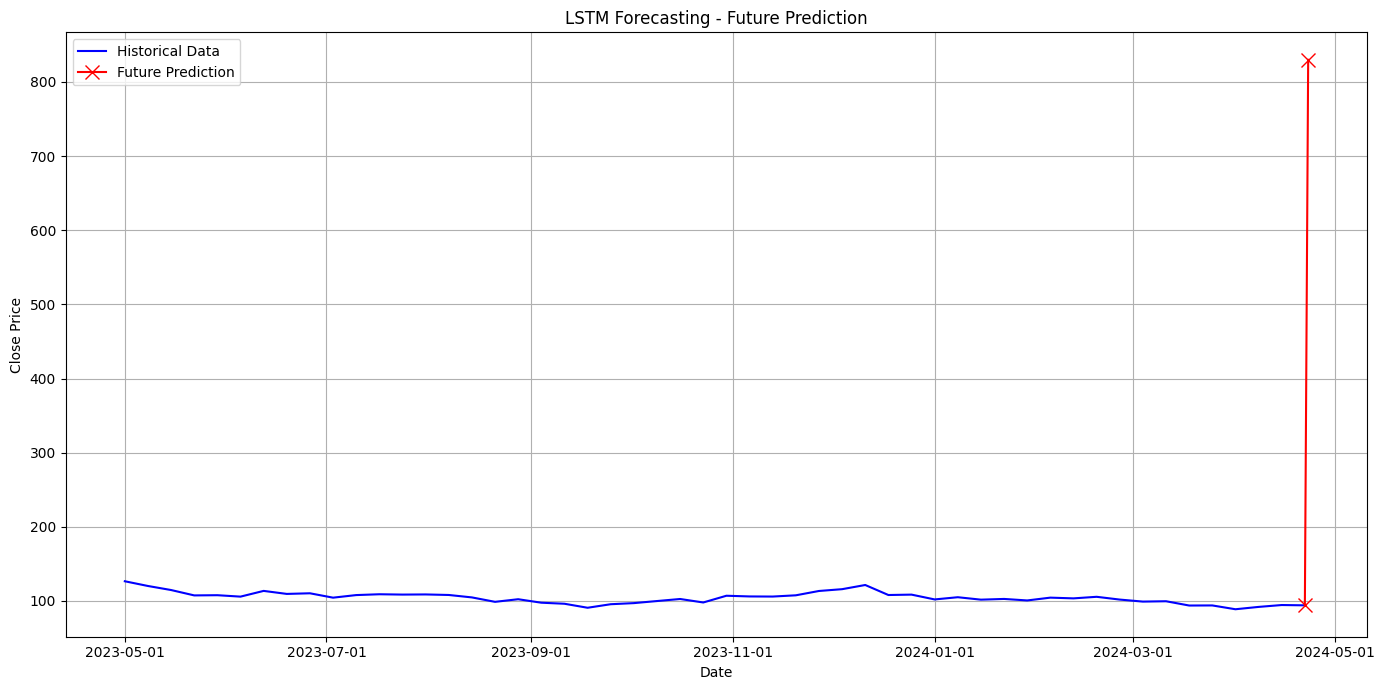

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, AutoDateLocator
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming 'lstm' is your trained LSTM model
# Assuming 'data' is your historical data dataframe

# Ensure the index of the data is datetime
data.index = pd.to_datetime(data.index)

# Preprocess your data and prepare the last window of historical data
feature_transform = data[['Close']].values
scaler = StandardScaler()
feature_transform = scaler.fit_transform(feature_transform)
last_window = feature_transform[-1:]  # Assuming last_window is shaped like (1, 1) as (number of samples, time steps)

# Reshape input to be [samples, time steps, features] for LSTM
last_window = np.reshape(last_window, (last_window.shape[0], 1, last_window.shape[1]))

# Make predictions for future values
future_predictions = lstm.predict(last_window)

# Inverse transform predictions if you scaled the data
future_predictions = scaler.inverse_transform(future_predictions)

# Print the predicted future value
print(f'Predicted Future Value: {future_predictions[0][0]}')

# Plotting the forecast including future prediction
plt.figure(figsize=(14, 7))

# Plot historical data
plt.plot(data.index, data['Close'], label='Historical Data', color='blue')

# Create an array of timestamps for future prediction
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date, periods=2, freq='D')  # Adjust periods as needed

# Plot future prediction
plt.plot(future_dates, [data['Close'].iloc[-1], future_predictions[0][0]], marker='x', markersize=10, label='Future Prediction', color='red')

plt.title('LSTM Forecasting - Future Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Customize the date formatting on the x-axis
date_format = DateFormatter('%Y-%m-%d')  # Example format: YYYY-MM-DD
ax = plt.gca()
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(AutoDateLocator())

plt.grid(True)
plt.tight_layout()
plt.show()


